# Lemmatization et Tokenization

In [32]:
import json
import re
import numpy as np
from pprint import pprint
import requests
import nltk.data
import matplotlib.pyplot as plt
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

In [2]:
class JSONObject:
     def __init__(self, d):
         self.__dict__ = d

In [3]:
with open("articles_Accuracy.json", "r") as read_file:
    data = read_file.read()
    obj = json.loads(data,object_hook=JSONObject)

In [4]:
len(obj)

11791

In [166]:
obj[0].title_en==''

True

In [5]:
print(obj[1].__dict__)

{'title_fr': 'Chéraute Loto des AEL Le loto des Amis de l’Ecole Laïque aura lieu le vendredi...', 'body_en': '', 'body': '', 'date_of_publication': '16 November 2017', 'title_en': '', 'source': 'La République des Pyrénées', 'body_fr': 'Chéraute Loto des AEL Le loto des Amis de l’Ecole Laïque aura lieu le vendredi 17 novembre, à 21 h, à la salle polyvalente de Chéraute. Neuf parties classiques, partie pour les enfants avec une tablette à gagner, loto souletin et deux parties spéciales Nombreux lots : filets garnis et bons d’achats dont un gros lot de 800 €. Ouverture des portes à 20 h. Salle chauffée. Buvette et boissons chaudes. Mauléon Présentation de livre Kepa Etxandi et Michel Duvert ont publié un livre/photos sur les linteaux de portes au Pays Basque. Ils le présenteront le samedi 2 décembre, à 10h, à Xibero Bio à Mauléon. Ce livre est un plaidoyer pour la conservation et la mise en valeur de ces pierres sculptées. Les maisons souletines en possèdent beaucoup mais elles sont malhe

In [6]:
## stopword dictionary
from nltk.corpus import stopwords
stopworddic = set(stopwords.words('french'))
article=['a','au','aux','un','une','le','la','les','de','du','des','ce','cet','cette','ces','son','sa','ses','leur','leurs','mon','ma','mes','ton','ta','tes','notre','notres','votre','votres']
pronom=['où','dont','ça','je','tu','il','elle','nous','vous','ils','elles','on','y','en','se','que','qui','quoi','comment','quand','pourquoi']
coordination=['mais','ou','et','donc','or','ni','car','ne']
v=['avoir','aller','être','faire']
prop=['selon','outre','après','dans','sur','dessus','sous','chez','hors','à','dehors','devant','derrière','avant','arrière','par','entre','parmi','avec','ici','là','bas','pour','pendant','depuis','voilà','dès','aussitôt']
adv=['pas','rien','personne','plus','aucun','jamais','nul','aussi','déjà']
conj=['comme','si','lorsque','tel']
stopworddic.update(set(article),set(pronom),set(coordination),set(v),set(prop),set(adv),set(conj))

In [144]:
stopworddic

{'a',
 'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'aller',
 'après',
 'arrière',
 'as',
 'au',
 'aucun',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aussi',
 'aussitôt',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avoir',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'bas',
 'c',
 'car',
 'ce',
 'ces',
 'cet',
 'cette',
 'chez',
 'comment',
 'd',
 'dans',
 'de',
 'dehors',
 'depuis',
 'derrière',
 'des',
 'dessus',
 'devant',
 'donc',
 'dont',
 'du',
 'dès',
 'elle',
 'elles',
 'en',
 'entre',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'faire',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'hors',
 'ici',
 'il',
 'ils',
 'j',
 'jamais',
 'je',
 'l'

In [7]:
## lemmatization
lemmatizer = FrenchLefffLemmatizer()
def lemma(word):
    a=lemmatizer.lemmatize(word,'all')
    b=[x[1] for x in a]
    if 'nc' in b:
        return lemmatizer.lemmatize(word,'n')
    if 'v' in b:
        return lemmatizer.lemmatize(word,'v')
    return lemmatizer.lemmatize(word)

In [8]:
## tokenization
def tokenize(article):
    rawtokens=nltk.word_tokenize(article)
    metokens = [w.lower() for w in rawtokens if re.search('[a-zA-ZàâäèéêëîïôœùûüÿçÀÂÄÈÉÊËÎÏÔŒÙÛÜŸÇ]+',w)]
    latokens=[]
    for str in metokens:
        if(re.search(r'\w+\'',str)):
            str=re.sub(r'\w+\'', '', str) 
        latokens.append(str)
    pre_tokens = [w for w in latokens if w not in stopworddic]
    return [lemma(w) for w in pre_tokens if lemma(w) not in stopworddic]
tokenize(obj[0].body_fr)

['groupe',
 'défense',
 'vouloir',
 'accompagner',
 'jeune',
 'pousse',
 'français',
 'haut',
 'potentiel',
 'banque',
 'compléter',
 'offre',
 'travailler',
 'insérer',
 'écosystème',
 'développement',
 'entreprise',
 'société',
 'générale',
 'mettre',
 'quête',
 'nouvelle',
 'pépite',
 'banque',
 'défense',
 'servir',
 'start-up',
 'juger',
 'particulièrement',
 'prometteuses',
 'annoncer',
 'mardi',
 'souhaiter',
 'séduire',
 'supplémentaires',
 'horizon',
 'ensemble',
 'territoire',
 'jargon',
 'banque',
 'pépite',
 'entreprise',
 'réussir',
 'premier',
 'levée',
 'fond',
 'moins',
 'euro',
 'accompagner',
 'incubateur',
 'phare',
 'fond',
 'capital-risque',
 'créer',
 'idéalement',
 'entrepreneur',
 'coup',
 'essai',
 'pouvoir',
 'agir',
 'entreprise',
 'suivre',
 'banque',
 'doit',
 'encore',
 'grandir',
 'recrutement',
 'externe',
 'parvenir',
 'banque',
 'peaufiner',
 'arsenal',
 'signer',
 'lundi',
 'prochain',
 'partenariat',
 'bpifrance',
 'vue',
 'notamment',
 'dialoguer',


# Classification

In [68]:
def is_french(obj):
    return (obj.body_en == ''and not obj.body_fr == '')
is_french(text[7])

False

In [69]:
token_text=[tokenize(w.body_fr) for w in obj if is_french(w)]

In [70]:
len(token_text)

7844

In [14]:
from gensim import corpora, models
import gensim

In [71]:
dictionary = corpora.Dictionary(token_text)
corpus = [dictionary.doc2bow(text) for text in token_text]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [72]:
lda = models.ldamodel.LdaModel(corpus_tfidf, id2word = dictionary, num_topics = 20,passes=20)

In [73]:
print("LDA Model:")
 
for idx in range(20):
    # Print the first 20 most representative topics
    print("Topic #%s:" % idx, lda.print_topic(idx, 10))
 
print("=" * 20)

LDA Model:
Topic #0: 0.001*"chain" + 0.001*"lafargeholcim" + 0.001*"accelerator" + 0.001*"skema" + 0.001*"ico" + 0.001*"freelance" + 0.001*"ivoire" + 0.000*"talao" + 0.000*"synergia" + 0.000*"purina"
Topic #1: 0.001*"nîmes" + 0.001*"12het" + 0.001*"2ème" + 0.001*"pécresse" + 0.001*"8ème" + 0.001*"8h30" + 0.001*"oracle" + 0.001*"event" + 0.001*"montbéliard" + 0.001*"anonyme"
Topic #2: 0.001*"tomorrow" + 0.001*"md€" + 0.001*"technowest" + 0.001*"softbank" + 0.000*"unitec" + 0.000*"technopole" + 0.000*"smiile" + 0.000*"laporte" + 0.000*"abidjan" + 0.000*"relevanc"
Topic #3: 0.003*"parc" + 0.003*"lycée" + 0.002*"fondation" + 0.002*"côte" + 0.002*"coopération" + 0.002*"provence" + 0.001*"azur" + 0.001*"thomas" + 0.001*"louer" + 0.001*"assemblée"
Topic #4: 0.004*"médiation" + 0.003*"victime" + 0.003*"17h" + 0.003*"indre" + 0.003*"12h" + 0.002*"adavim" + 0.002*"adavimawanadoo.fr" + 0.002*"droit" + 0.002*"nécrologiques" + 0.002*"carnetanr-communication.fr"
Topic #5: 0.001*"niort" + 0.001*"nior

In [74]:
thetas=[lda[c] for c in corpus_tfidf]

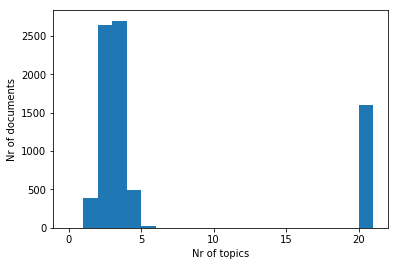

In [75]:
plt.hist([len(t) for t in thetas], np.arange(22))
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.show()

In [76]:
text=[w for w in obj if is_french(w)]

In [91]:
thetas

[[(3, 0.030871067), (9, 0.89127994)],
 [(3, 0.12281027), (6, 0.0277528), (9, 0.7491049)],
 [(3, 0.0707802), (6, 0.044520054), (9, 0.80323917)],
 [(3, 0.039583668), (9, 0.7969141), (15, 0.09463364)],
 [(3, 0.099709734), (9, 0.7819463)],
 [(3, 0.13162574), (9, 0.7086974)],
 [(3, 0.050712213), (9, 0.6299409), (15, 0.2903467)],
 [(3, 0.05881633), (9, 0.8021197)],
 [(0, 0.01112311),
  (1, 0.01112311),
  (2, 0.01112311),
  (3, 0.01112311),
  (4, 0.01112311),
  (5, 0.01112311),
  (6, 0.01112311),
  (7, 0.7886609),
  (8, 0.01112311),
  (9, 0.011123111),
  (10, 0.01112311),
  (11, 0.01112311),
  (12, 0.01112311),
  (13, 0.01112311),
  (14, 0.01112311),
  (15, 0.01112311),
  (16, 0.01112311),
  (17, 0.01112311),
  (18, 0.01112311),
  (19, 0.01112311)],
 [(0, 0.01397863),
  (1, 0.01397863),
  (2, 0.01397863),
  (3, 0.01397863),
  (4, 0.01397863),
  (5, 0.01397863),
  (6, 0.013978642),
  (7, 0.01397863),
  (8, 0.01397863),
  (9, 0.5896221),
  (10, 0.15876256),
  (11, 0.01397863),
  (12, 0.01397863

In [90]:
text[12].__dict__

{'title_fr': "Scipio Bioscience boucle un tour d'amorçage de 1,2 M€",
 'body_en': '',
 'body': '',
 'date_of_publication': '15 November 2017',
 'title_en': '',
 'source': 'Capitalfinance.fr',
 'body_fr': "Installée dans l’incubateur iPEPS-ICM de l’Institut du Cerveau et de la Moelle épinière, à la Pitié-Salpêtrière, Scipio Bioscience développe depuis près d’un an une solution de préparation d’échantillons pour les études sur cellules individuelles. Pour ces travaux de recherche, la jeune pousse vient de boucler un tour d’amorçage de 1,2 M€, en ouvrant son capital à deux fonds européens: Quadrivium 1, le véhicule d’amorçage de Seventure Partners, et l’allemand High-Tech Gründerfonds (l’un des amorceurs les plus actifs outre-Rhin). Cet apport préliminaire financera en particulier le renforcement des équipes R & D de Scipio bioscience, aujourd’hui fortes d’une demi-douzaine de collaborateurs, et l’ouverture d’un deuxième centre de recherche en Allemagne dès l’an prochain. «Les coûts et co

# Test of spaCy

In [77]:
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger

nlp = spacy.load('fr')
pos = POSTagger()
french_lemmatizer = LefffLemmatizer(after_melt=True)
nlp.add_pipe(pos, name='pos', after='parser')
nlp.add_pipe(french_lemmatizer, name='lefff', after='pos')

2019-01-22 00:01:03,856 - spacy_lefff.downloader - INFO - data already set up
2019-01-22 00:01:03,859 - spacy_lefff.melt_tagger - INFO - Token melt_tagger already registered
2019-01-22 00:01:03,861 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading lexicon...
2019-01-22 00:01:04,865 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading tags...
2019-01-22 00:01:04,958 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from C:\Users\ZTY\Anaconda3\lib\site-packages\spacy_lefff\data\tagger\models/fr...
2019-01-22 00:01:06,871 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from C:\Users\ZTY\Anaconda3\lib\site-packages\spacy_lefff\data\tagger\models/fr: done
2019-01-22 00:01:06,875 - spacy_lefff.lefff - INFO - New LefffLemmatizer instantiated.
2019-01-22 00:01:06,878 - spacy_lefff.lefff - INFO - Token lefff_lemma already registered
2019-01-22 00:01:06,882 - spacy_lefff.lefff - INFO - Reading lefff data...
2019-01-22 00:01:08,390 - spacy_lefff.lefff - INFO - Successfully 

In [73]:
doc = nlp("Nous l'avions banqué... ..")
for d in doc:
    print(d.text, d.pos_, d.lemma_)

2019-01-21 21:02:40,931 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Nous PRON Nous
l' DET le
avions AUX avoir
banqué ADJ banquer
... PUNCT ...
.. PUNCT ..


In [76]:
type(doc[0].lemma_)

str

In [64]:
doc=nlp(obj[0].body_fr)
for ent in doc.ents:
    print(ent.text, ent.label_)

2019-01-21 20:50:04,933 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Société Générale ORG
banque de la Défense ORG
BNP Paribas PER
Welcome MISC
Industrialiser PER
Station F MISC
WeWork LOC
Le Tremplin LOC
France LOC
Les Dunes MISC
Fontenay-sous-Bois LOC
Le LOC


In [63]:
displacy.render(doc, style='ent', jupyter=True)